### 1. Data Preprocessing

In [1]:
# Reading the data set 'Disease_train.csv'
import pandas as pd
import numpy as np
df = pd.read_csv('Disease_train.csv')
# Displaying the first rows of the data
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,patient_id,diagnosis
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,1,0
1,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,2,0
2,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,3,0
3,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,0.140924,0.802197,0.074551,0.986887,7,0
4,0.772245,0.198716,0.005522,0.815461,0.706857,0.729007,0.771270,0.074045,0.358466,0.115869,8,0


In [2]:
# Dropping 'patient_id' column as it does not carry much importance
df_filtered = df.drop('patient_id', axis = 1)
df_filtered.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,diagnosis
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,0
1,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,0
2,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,0
3,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,0.140924,0.802197,0.074551,0.986887,0
4,0.772245,0.198716,0.005522,0.815461,0.706857,0.729007,0.771270,0.074045,0.358466,0.115869,0


In [3]:
# Finding the descriptive statistics of each column
description = df_filtered.describe()
description

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,diagnosis
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.496069,0.491044,0.503519,0.502119,0.495318,0.507759,0.497923,0.497090,0.501020,0.494890,0.049000
std,0.288953,0.291494,0.286390,0.288486,0.287585,0.289912,0.287114,0.288757,0.286779,0.289483,0.215895
min,0.000125,0.000017,0.000012,0.000158,0.000135,0.000048,0.000006,0.000053,0.000110,0.000311,0.000000
25%,0.247032,0.234190,0.251840,0.253933,0.248068,0.257390,0.252403,0.251845,0.249991,0.243098,0.000000
50%,0.494948,0.492201,0.504478,0.505861,0.496022,0.508030,0.500362,0.494209,0.503962,0.492061,0.000000
75%,0.748640,0.745044,0.748674,0.748107,0.745684,0.765333,0.741808,0.752467,0.745230,0.743099,0.000000
max,0.999805,0.999789,0.999957,0.999901,0.999241,0.999697,0.999972,0.999824,0.999350,0.999673,1.000000


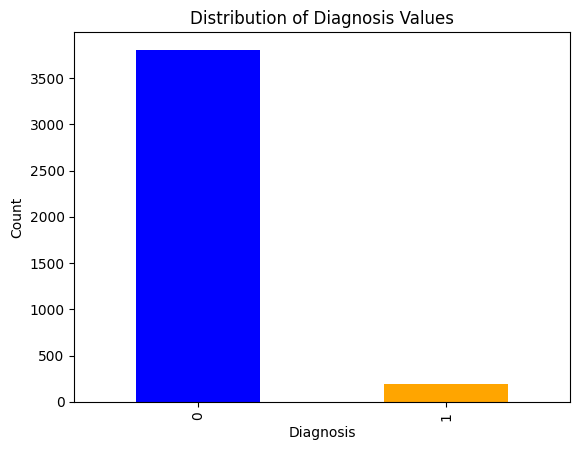

In [4]:
# Display the distribution of classes
import matplotlib.pyplot as plt
%matplotlib inline
diagnosis_counts = df['diagnosis'].value_counts()
diagnosis_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Diagnosis Values')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()
# Means class imbalance

In [5]:
# To deal with class imbalance, we use SMOTE (sythentic minority oversampling technique)
from imblearn.over_sampling import SMOTE
X_o = df_filtered.drop('diagnosis', axis = 1)
y_o = df_filtered['diagnosis']

# Printing number of samples in each class before Over-Sampling
t = [(d) for d in y_o if d==0]
s = [(d) for d in y_o if d==1]
print('Before Over-Sampling: ')
print('Samples in class 0: ',len(t))
print('Samples in class 1: ',len(s))

smote = SMOTE()

# Fit predictor (x variable)and target (y variable) using fit_resample()
X_OverSmote, Y_OverSmote = smote.fit_resample(X_o, y_o)

# Printing number of samples in each class after Over-Sampling
t = [(d) for d in Y_OverSmote if d==0]
s = [(d) for d in Y_OverSmote if d==1]
print('After Over-Sampling: ')
print('Samples in class 0: ',len(t))
print('Samples in class 1: ',len(s))

Before Over-Sampling: 
Samples in class 0:  3804
Samples in class 1:  196
After Over-Sampling: 
Samples in class 0:  3804
Samples in class 1:  3804


In [6]:
# Scaling the OverSmote data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_OverSmote)

# Convert scaled features and target back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_o.columns)
Y_scaled_df = pd.Series(Y_OverSmote, name='diagnosis')

In [7]:
X_scaled_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,-0.405929,1.671201,0.871711,0.333317,-1.232685,-1.282460,-1.490890,1.310978,0.341350,0.820682
1,-1.720976,1.742964,1.241175,-1.052595,-1.139023,-1.183983,-0.635430,0.067108,-0.292391,-0.702095
2,0.475756,-1.361600,-0.746113,-0.500042,-0.143673,0.978016,-0.998830,0.028774,0.308756,-1.596300
3,-0.353406,-0.868651,1.227547,-0.534512,-0.779313,0.106853,-1.202999,1.077887,-1.631255,1.839224
4,1.071658,-1.140195,-1.800349,1.111093,0.766540,0.776217,0.987604,-1.574936,-0.567658,-1.342706


### 2. Model Training

In [8]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled_df, Y_scaled_df, random_state=42)

In [9]:
X_train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
count,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000
mean,-0.009956,-0.003044,0.000044,-0.002624,-0.003199,-0.013460,-0.002413,-0.002974,-0.007128,-0.002239
std,0.998483,1.002454,0.999204,1.004211,1.006432,1.004321,0.999949,1.001486,1.002641,0.994121
min,-1.796989,-1.882992,-1.820617,-1.813790,-1.798289,-1.842732,-1.690913,-1.841262,-1.910123,-1.764529
25%,-0.850351,-0.807762,-0.844662,-0.869281,-0.879766,-0.895889,-0.898333,-0.791654,-0.834689,-0.846552
50%,-0.073616,0.023878,-0.011114,0.029225,-0.006241,0.009285,-0.022441,-0.032027,0.007352,-0.052761
75%,0.814897,0.827068,0.799556,0.861087,0.863878,0.872289,0.889550,0.866151,0.837815,0.827739
max,1.917110,1.854671,1.857315,1.772765,1.827722,1.748732,1.782398,1.797886,1.833211,1.885933


In [10]:
y_train.describe()

count    5706.000000
mean        0.499649
std         0.500044
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: diagnosis, dtype: float64

In [11]:
X_val.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
count,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000
mean,0.029867,0.009131,-0.000132,0.007873,0.009597,0.040379,0.007240,0.008921,0.021383,0.006718
std,1.004470,0.993072,1.002909,0.987745,0.980919,0.986349,1.000643,0.996002,0.992255,1.017926
min,-1.796559,-1.883044,-1.819530,-1.812157,-1.798453,-1.842032,-1.692725,-1.844505,-1.907337,-1.764853
25%,-0.830391,-0.764387,-0.860480,-0.818935,-0.835021,-0.785927,-0.909049,-0.782983,-0.801031,-0.849128
50%,0.048491,0.018287,-0.001886,0.025042,-0.013795,0.085789,0.000178,0.021422,0.051465,-0.030284
75%,0.898833,0.807296,0.803501,0.842050,0.854299,0.892125,0.895647,0.830525,0.856222,0.866618
max,1.913516,1.850289,1.847314,1.771186,1.820978,1.745328,1.775189,1.795384,1.829595,1.884698


In [12]:
y_val.describe()

count    1902.000000
mean        0.501052
std         0.500130
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: diagnosis, dtype: float64

In [13]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [15]:
# Using XGboost as the classification model for this problem
# Hyperparameter optimization 
paramaters = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
 "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "n_estimators"     : [50, 100, 150, 200, 250, 300, 350, 400]   
}   

In [16]:
classifier = xgboost.XGBClassifier()
grid_search = GridSearchCV(estimator=classifier, param_grid=paramaters, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

In [17]:
# Fit the random search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 7680 candidates, totalling 38400 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'min_child_weight': [1, 3, 5, 7],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          400]},
             scoring='roc_auc', verbose=1)

In [18]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
best_parameters = grid_search.best_params_
best_parameters

{'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 15,
 'min_child_weight': 1,
 'n_estimators': 350}

In [20]:
# Using best parameters for creating the XGboost classifier
xgboost_with_best_parameters = xgboost.XGBClassifier(**best_parameters)

In [21]:
# Training our classifier using training data'
xgboost_with_best_parameters.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
# Predicting values for validation data
predictions_val = xgboost_with_best_parameters.predict(X_val)

In [23]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score, roc_auc_score
roc_auc_score = roc_auc_score(y_val, predictions_val)
accuracy_score = accuracy_score(y_val, predictions_val)

In [24]:
# ROC AUC score on the validation data 
roc_auc_score

0.9547333748342819

In [25]:
#Accuracy score on the validation data
accuracy_score

0.9547844374342797

### 3. Prediction

In [26]:
df_testing = pd.read_csv('Disease_test.csv')
df_testing.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,patient_id
0,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,4
1,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,5
2,0.969585,0.775133,0.939499,0.894827,0.597900,0.921874,0.088493,0.195983,0.045227,0.325330,6
3,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891,10
4,0.289751,0.161221,0.929698,0.808120,0.633404,0.871461,0.803672,0.186570,0.892559,0.539342,12


In [27]:
patient_id = df_testing['patient_id']
df_testing_1 = df_testing.drop('patient_id', axis = 1)

In [28]:
df_test_scaled = scaler.fit_transform(df_testing_1)
predictions_testing = xgboost_with_best_parameters.predict(df_test_scaled)
output = pd.DataFrame({'patient_id': patient_id, 'prediction': predictions_testing})

In [29]:
output.to_csv('SE22UCSE074_predictions.csv', index=False)